initial money:20
how many student:2500
round:10000
可負債?(按1可以)0
[28, 28, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 

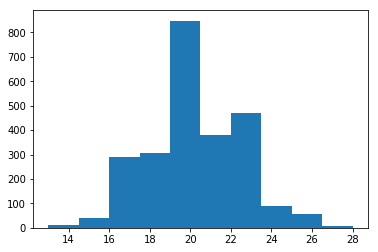

(array([ 10.,  41., 288., 308., 848., 378., 471.,  90.,  58.,   8.]), array([13. , 14.5, 16. , 17.5, 19. , 20.5, 22. , 23.5, 25. , 26.5, 28. ]), <a list of 10 Patch objects>)
[13.75 15.25 16.75 18.25 19.75 21.25 22.75 24.25 25.75 27.25]
[373.50819546] [[16190.4325409]]


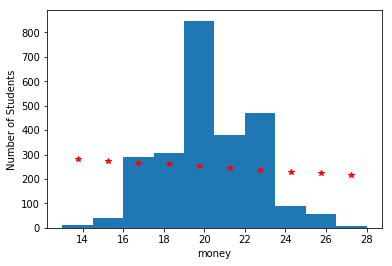

In [12]:
import numpy as np
import matplotlib.pyplot as plt

m = int(input('initial money:'))
n = int(input('how many student:'))
k = int(input('round:'))

dm = 1  #賭金
no_money_mode = int(input('可負債?(按1可以)'))
if no_money_mode == 1:
    print('可負債')
money_array = []

for i in range(0,n):
    money_array.append(m)

for i in range(0,k):
    a = n
    for j in range(0,len(money_array)):
        if money_array[j] <= 0:
            a -= 1   #people does not bankrupt
    
    result = np.random.randint(0,3)  #猜拳
    
    if no_money_mode == 1:
        people1_in_game = np.random.randint(0,n)  #choose first person
        people2_in_game = np.random.randint(0,n)  #choose second person
        
        while people2_in_game == people1_in_game:
            people2_in_game = np.random.randint(0,n)  #again choose second person
    else:
        money_array = sorted(money_array,reverse = True)  #大到小
        
        people1_in_game = np.random.randint(0,a)  #choose first person
        people2_in_game = np.random.randint(0,a)  #choose second person
        
        while people2_in_game == people1_in_game and a > 1:
            people2_in_game = np.random.randint(0,a)  #again choose second person
            
        if a == 1:
            print('over')
            break
    
    if result == 1:
        money_win = dm + money_array[people1_in_game]
        money_lose = money_array[people2_in_game] - dm
        
        money_array[people1_in_game] = money_win
        money_array[people2_in_game] = money_lose
        
    elif result == 2:
        money_win = dm + money_array[people2_in_game]
        money_lose = money_array[people1_in_game] - dm
        money_array[people2_in_game] = money_win
        money_array[people1_in_game] = money_lose
        
money_array = sorted(money_array,reverse = True)
print(money_array)
plt.hist(money_array)
plt.show()


b=plt.hist(money_array,10)
print(b)
dx=(b[1][1]-b[1][0])
bin_center=np.array(b[1][0:-1])+dx/2
print(bin_center)

from scipy import optimize

def test_func(x,amp):
    return amp*np.exp(-x/50)

params, params_covariance = optimize.curve_fit(test_func, bin_center,b[0])
print(params, params_covariance)

plt.plot(bin_center, test_func(bin_center, params[0]), "r*", label="fitted function")

plt.xlabel("money")
plt.ylabel("Number of Students")
plt.show()